PROYECTO #2 EMTECH, SINERGY LOGISTICS

#María Guadalupe Juárez Ruiz

In [79]:
#Bibliotecas que se van a ocupar
import pandas as pd
import matplotlib.pyplot as plt

In [80]:
#base de datos con la que se trabaja
sldb=pd.read_csv("synergy_logistics_database.csv")

In [81]:
#Se crean los DataFrame de exportaciones e importanciones
#Se van a utilizar en varias partes del programa
exportaciones = sldb[sldb['direction']== 'Exports']
importaciones = sldb[sldb['direction']== 'Imports']

In [82]:
#Se genera una suma total de ganancias para tenerlo como punto de comparación para cada opción
ganancias_totales=sldb['total_value'].sum()
ganancias_totales

215691298000

## 1 Rutas de importación y exportación
Ruta: combinación de origen, destino y medio de transporte

Se desea saber las 10 rutas más demandadas para exportaciones e importaciones

In [83]:
#Se genera un cálculo general de rutas para exportaciones e importaciones, para poder comparar el valor total
rutas = sldb.groupby(['direction','origin','destination','transport_mode'])
suma = rutas.sum()['total_value']
#Se realiza .describe() para poder agregar la suma y tener el count (cuántas veces se usaron)
rutas = rutas['total_value'].describe()
rutas['suma_total'] = suma
rutas = rutas.reset_index()

*Se calcula el Top 10 de las rutas más demandadas para exportaciones

In [84]:
#rutas de exportaciones
rutas_exp = rutas[rutas['direction']=='Exports']
top_rutasexp= rutas_exp.sort_values(by='count',ascending=False).head(10)

#Se genera un archivo de excel para poder exponer la tabla en el reporte
top_rutasexp.to_excel('Toprutas_exportaciones.xlsx')
top_rutasexp

#rutas_exp

,direction,origin,destination,transport_mode,count,mean,std,min,25%,50%,75%,max,suma_total
134,Exports,South Korea,Vietnam,Sea,497.0,1.383704e+07,1.071060e+07,0.0,6000000.0,11000000.0,18000000.0,65000000.0,6877007000
154,Exports,USA,Netherlands,Sea,436.0,2.367401e+06,3.425529e+06,0.0,1000.0,4000.0,4000000.0,23000000.0,1032187000
108,Exports,Netherlands,Belgium,Road,374.0,8.636615e+06,1.787992e+07,0.0,1000.0,3000000.0,7000000.0,229000000.0,3230094000
34,Exports,China,Mexico,Air,330.0,3.712121e+07,2.582412e+07,0.0,19000000.0,35000000.0,52000000.0,140000000.0,12250000000
86,Exports,Japan,Brazil,Sea,306.0,1.100704e+07,1.115415e+07,0.0,1000000.0,8000000.0,17000000.0,52000000.0,3368155000
57,Exports,Germany,France,Road,299.0,9.706401e+06,1.577356e+07,0.0,2000.0,3000000.0,10000000.0,88000000.0,2902214000
131,Exports,South Korea,Japan,Sea,279.0,1.646595e+07,8.336327e+06,2000000.0,10000000.0,15000000.0,20500000.0,45000000.0,4594000000
3,Exports,Australia,Singapore,Sea,273.0,1.805861e+06,1.607325e+06,0.0,1000000.0,1000000.0,2000000.0,12000000.0,493000000
25,Exports,Canada,Mexico,Rail,261.0,3.237548e+07,2.433130e+07,0.0,11000000.0,31000000.0,49000000.0,103000000.0,8450000000
38,Exports,China,Spain,Air,250.0,7.448000e+06,9.225385e+06,0.0,2000000.0,4000000.0,8000000.0,54000000.0,1862000000


Se calcula el Top 10 de las rutas más demandadas para importaciones

In [85]:
#rutas de importaciones
rutas_imp = rutas[rutas['direction']=='Imports']
top_rutasimp= rutas_imp.sort_values(by='count',ascending=False).head(10)

#Se genera un archivo de excel para poder exponer la tabla en el reporte
top_rutasimp.to_excel('Toprutas_importaciones.xlsx')
top_rutasimp

#rutas_imp

,direction,origin,destination,transport_mode,count,mean,std,min,25%,50%,75%,max,suma_total
198,Imports,Singapore,Thailand,Sea,273.0,1.471429e+07,1.216850e+07,1000000.0,4000000.0,14000000.0,20000000.0,69000000.0,4017000000
176,Imports,Germany,China,Sea,233.0,5.699571e+06,4.801656e+06,0.0,2000000.0,5000000.0,8000000.0,23000000.0,1328000000
167,Imports,China,Japan,Air,210.0,1.541429e+07,1.151013e+07,1000000.0,3000000.0,14500000.0,23000000.0,46000000.0,3237000000
184,Imports,Japan,Mexico,Sea,206.0,1.901942e+07,1.764251e+07,0.0,4000000.0,11000000.0,36000000.0,61000000.0,3918000000
190,Imports,Malaysia,Thailand,Rail,195.0,1.785641e+07,1.545128e+07,1000000.0,3000000.0,17000000.0,25000000.0,69000000.0,3482000000
171,Imports,China,Thailand,Road,145.0,1.921379e+07,1.652741e+07,1000000.0,5000000.0,15000000.0,27000000.0,78000000.0,2786000000
203,Imports,Spain,Germany,Road,142.0,1.439437e+07,1.399035e+07,0.0,3000000.0,5500000.0,27750000.0,45000000.0,2044000000
173,Imports,China,United Arab Emirates,Sea,114.0,2.944737e+07,2.043123e+07,1000000.0,6000000.0,34500000.0,46000000.0,85000000.0,3357000000
164,Imports,Brazil,China,Sea,113.0,3.654867e+06,2.701752e+06,0.0,1000000.0,4000000.0,5000000.0,12000000.0,413000000
211,Imports,USA,Thailand,Sea,109.0,1.438532e+07,9.922765e+06,1000000.0,3000000.0,16000000.0,21000000.0,41000000.0,1568000000


*Como adicional se genera la parte correspondiente al porcentaje de ganancia por top exportaciones o importaciones

In [95]:
#Parte interactiva del porcentaje correspodiente a ganancias por importaciones y exportaciones
#df representa el dataframe seleccionado, en este caso rutas exportaciones o rutas importaciones
def ganancias_x_rutastop(df,top=10):
    #Se genera la información de el valor total
    suma_tot_df= df['suma_total'].sum()
    topusos= df.sort_values(by='suma_total', ascending=False).head(top)
    suma_tot_top= topusos['suma_total'].sum()

    #Se asocia un porcentaje del valor total al top elegido
    total_usos= topusos['count'].sum()
    porcent= (suma_tot_top/suma_tot_df)*1000
    porcent=int(porcent)/100

    print(f'Las {top} rutas más demandadas, aportan el {porcent}% de las ganancias.\nTotal de servicios prestados:{total_usos}')

#Se usa la variable para las rutas
ganancias_x_rutastop(rutas_exp,10)
ganancias_x_rutastop(rutas_imp,10)

Las 10 rutas más demandadas, aportan el 3.66% de las ganancias.
Total de servicios prestados:2194.0
Las 10 rutas más demandadas, aportan el 5.21% de las ganancias.
Total de servicios prestados:1524.0


## 2 Medio de transporte utilizado
Con base en las importaciones y las exportaciones 
¿Cuáles son los 3 medios de trasnporte más importantes para Synergy Logistics?

*Nota: Para resolver esta cuestión, se están tomando en cuenta todos los medios de transporte para argumentar en el reporte acerca de esta opción

In [87]:
#Retomamos la variable de exportaciones y agrupamos por el medio de transporte
trans_exp = exportaciones.groupby(['transport_mode'])
#Esta variable cuenta las veces que cada transporte fue utilizado (Se hace DataFrame)
top_transexp = trans_exp.count()['total_value']
top_transexp=top_transexp.reset_index()

#Usamos una variable que tenga el acumulado de ventas por cada transporte
ganancias=trans_exp['total_value'].sum()
ganancias=ganancias.reset_index()

#Agregamos al DataFrame de transporte las ganancias generadas
top_transexp['ganancias']=ganancias['total_value']
#Agregamos otra columna con una cantidad de números menor por practicidad en los gráficos
top_transexp['ganancias*10e-9']=round((top_transexp['ganancias']*0.000000001),2)
top_transexp = top_transexp.sort_values('total_value',ascending=False).head()

#verificamos que porcentaje de ganancias representa cada transporte
T_gan=top_transexp['ganancias'].sum()
top_transexp['porcentaje_gan']=round((top_transexp['ganancias']/T_gan)*100,2)
top_transexp=top_transexp.sort_values('porcentaje_gan',ascending=False).head()
top_transexp['%acumulado_gan']=top_transexp.cumsum()['porcentaje_gan']

top_transexp=top_transexp.sort_values('total_value',ascending=False).head()
top_transexp



,transport_mode,total_value,ganancias,ganancias*10e-9,porcentaje_gan,%acumulado_gan
3,Sea,8434,65592622000,65.59,40.95,40.95
1,Rail,2780,34505043000,34.51,21.54,62.49
2,Road,2149,27280486000,27.28,17.03,99.99
0,Air,2045,32785147000,32.79,20.47,82.96


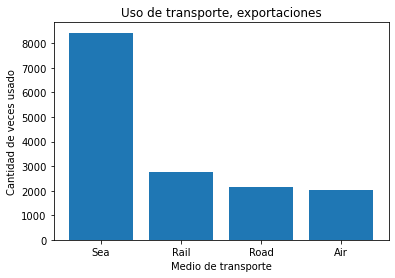

In [88]:
#Generamos el gráfico para la cantidad de veces que se usó un transporte
x_values = top_transexp['transport_mode']
y_values = top_transexp['total_value']
plt.bar(x_values, y_values)
plt.title('Uso de transporte, exportaciones')
ax = plt.subplot()                   
ax.set_xticks(x_values)             
ax.set_xticklabels(x_values)       
ax.set_xlabel('Medio de transporte')  
ax.set_ylabel('Cantidad de veces usado')
plt.show()
plt.close('all')


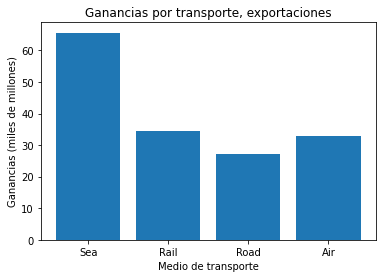

In [89]:
#Generamos el gráfico para la cantidad de veces que se usó un transporte
x_values = top_transexp['transport_mode']
y_values = top_transexp['ganancias*10e-9']
plt.bar(x_values, y_values)
plt.title('Ganancias por transporte, exportaciones')
ax = plt.subplot()                   
ax.set_xticks(x_values)             
ax.set_xticklabels(x_values)       
ax.set_xlabel('Medio de transporte')  
ax.set_ylabel('Ganancias (miles de millones)')
plt.show()
plt.close('all')

importaciones

In [90]:
#Retomamos la variable de importaciones y agrupamos por el medio de transporte
trans_imp = importaciones.groupby(['transport_mode'])
#Esta variable cuenta las veces que cada transporte fue utilizado (Se hace DataFrame)
top_transimp = trans_imp.count()['total_value']
top_transimp = top_transimp.reset_index()

#Usamos una variable que tenga el acumulado de ventas por cada transporte
ganancias_imp=trans_imp['total_value'].sum()
ganancias_imp=ganancias_imp.reset_index()

#Agregamos al DataFrame de transporte las ganancias generadas
top_transimp['ganancias']=ganancias_imp['total_value']
#Agregamos otra columna con una cantidad de números menor por practicidad en los gráficos
top_transimp['ganancias*10e-9']=round((top_transimp['ganancias']*0.000000001),2)
top_transimp = top_transimp.sort_values('total_value',ascending=False).head()

#verificamos que porcentaje de ganancias representa cada transporte
T_gan_imp=top_transimp['ganancias'].sum()
top_transimp['porcentaje_gan']=round((top_transimp['ganancias']/T_gan_imp)*100,2)
top_transimp=top_transimp.sort_values('porcentaje_gan',ascending=False).head()
top_transimp['%acumulado_gan']=top_transimp.cumsum()['porcentaje_gan']

top_transimp=top_transimp.sort_values('total_value',ascending=False).head()
top_transimp


,transport_mode,total_value,ganancias,ganancias*10e-9,porcentaje_gan,%acumulado_gan
3,Sea,2254,34938000000,34.94,62.92,62.92
1,Rail,601,9123000000,9.12,16.43,79.35
2,Road,449,5990000000,5.99,10.79,90.14
0,Air,344,5477000000,5.48,9.86,100.00


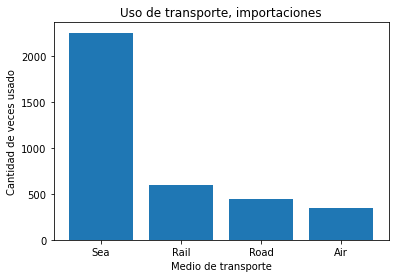

In [91]:
#Generamos el gráfico para la cantidad de veces que se usó un transporte
x_values = top_transimp['transport_mode']
y_values = top_transimp['total_value']
plt.bar(x_values, y_values)
plt.title('Uso de transporte, importaciones')
ax = plt.subplot()                   
ax.set_xticks(x_values)             
ax.set_xticklabels(x_values)       
ax.set_xlabel('Medio de transporte')  
ax.set_ylabel('Cantidad de veces usado')
plt.show()
plt.close('all')

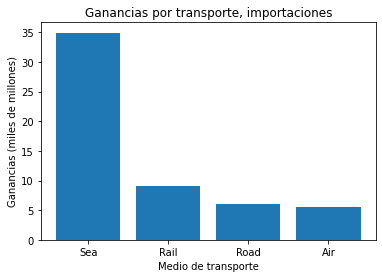

In [92]:
#Generamos el gráfico para la cantidad de veces que se usó un transporte
x_values = top_transimp['transport_mode']
y_values = top_transimp['ganancias*10e-9']
plt.bar(x_values, y_values)
plt.title('Ganancias por transporte, importaciones')
ax = plt.subplot()                   
ax.set_xticks(x_values)             
ax.set_xticklabels(x_values)       
ax.set_xlabel('Medio de transporte')  
ax.set_ylabel('Ganancias (miles de millones)')
plt.show()
plt.close('all')

## 2 Valor total de importaciones y exportaciones
Con base en las importaciones y las exportaciones 
¿Cuáles son los países que aportan el 80% del valor de estas?

In [93]:
#EXPORTACIONES
#Generamos la suma total de ganancias para exportaciones
total_exp=exportaciones['total_value'].sum()
#Asignamos un porcentaje de aportación a cada exportación a la ganancia total
expor_gan = exportaciones.groupby(['origin'])
ganan_expor= expor_gan.sum()['total_value']
ganan_expor=ganan_expor.reset_index()
#Esta variable cuenta las veces que cada transporte fue utilizado (Se hace DataFrame)
ganan_expor['porcentaje']=round((ganan_expor['total_value']/total_exp)*100,2)
ganan_expor=ganan_expor.sort_values('porcentaje',ascending=False).head(20)
ganan_expor['% acumulado']=ganan_expor.cumsum()['porcentaje']
#Genero un archivo excel para darle formato a la tabla del reporte
ganan_expor.to_excel('VTotal_exportaciones.xlsx')
ganan_expor

#total_exp

160163298000

In [94]:
#IMPORTACIONES
#Generamos la suma total de ganancias para exportaciones
total_imp=importaciones['total_value'].sum()
#Asignamos un porcentaje de aportación a cada exportación a la ganancia total
impor_gan = importaciones.groupby(['origin'])
ganan_impor= impor_gan.sum()['total_value']
ganan_impor=ganan_impor.reset_index()
#Esta variable cuenta las veces que cada transporte fue utilizado (Se hace DataFrame)
ganan_impor['porcentaje']=round((ganan_impor['total_value']/total_imp)*100,2)
ganan_impor=ganan_impor.sort_values('porcentaje',ascending=False).head(20)
ganan_impor['% acumulado']=ganan_impor.cumsum()['porcentaje']
ganan_impor.to_excel('VTotal_importaciones.xlsx')
ganan_impor

#total_imp

55528000000